### Student Information
Name: 蔡哲維

Student ID: 109062562

GitHub ID: sponge611

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

### Take Home Exercises

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)


# Convert into DataFrame
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

### Execise 2

In [2]:
# Select the category_name column

category_series = X['category_name']

# Show the first 10 element of the category_name column

category_series[:10]

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
5    soc.religion.christian
6    soc.religion.christian
7                   sci.med
8                   sci.med
9                   sci.med
Name: category_name, dtype: object

In [3]:
# Exchange the elements in category with elements in category_name

X[['category', 'category_name']] = X[['category_name', 'category']]

X.head()

text                category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian   

   category_name  
0              1  
1              1  
2              3  
3              3  
4              3

In [4]:
# Exchange again to get the original dataframe :)

X[['category', 'category_name']] = X[['category_name', 'category']]

X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [5]:
# Access columns in DataFrame with attributes

X.category

0       1
1       1
2       3
3       3
4       3
       ..
2252    2
2253    2
2254    2
2255    2
2256    2
Name: category, Length: 2257, dtype: int64

In [6]:
# Add a dummy column in DataFrame X, the value is the index of that row plus 1000

X['dummy'] = list(range(1000,(1000+len(X.index))))

X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  dummy  
0           comp.graphics   1000  
1           comp.graphics   1001  
2  soc.religion.christian   1002  
3  soc.religion.christian   1003  
4  soc.religion.christian   1004

In [7]:
# Set the first 3 rows' value in 'dummy' to be 0

X.loc[:2,'dummy'] = 0

X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  dummy  
0           comp.graphics      0  
1           comp.graphics      0  
2  soc.religion.christian      0  
3  soc.religion.christian   1003  
4  soc.religion.christian   1004

Drop the dummy column

In [8]:
X.drop('dummy',axis=1,inplace=True)

X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [9]:
# Getting the boolean array of whether category_name is equal tp comp.graphics

boolean_array = X['category_name'] == 'comp.graphics'

print(boolean_array)

0        True
1        True
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Name: category_name, Length: 2257, dtype: bool


In [10]:
X_after_select = X[boolean_array.values]

X_after_select.head()

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics

In [11]:
X_after_select[-10:]

text  category  \
2210  From: edimg@willard.atl.ga.us (Ed pimentel) Su...         1   
2214  From: tychay@cco.caltech.edu (Terrence Y. Chay...         1   
2220  From: idr@rigel.cs.pdx.edu (Ian D Romanick) Su...         1   
2224  From: havardn@edb.tih.no (Haavard Nesse,o92a) ...         1   
2226  From: nahess@mir.gatech.edu (Nicholas A. Hess)...         1   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
2210  comp.graphics  
2214  comp.graphics  
2220  comp.graphics  
2224  comp.graphics  
2226  comp.graphics  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics

In [12]:
# Selection by callable 1

X_after_selct = X.loc[lambda df:df['category_name'] == 'sci.med', :]

X_after_selct.head()

text  category category_name
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2       sci.med
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2       sci.med
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2       sci.med
28  From: rind@enterprise.bih.harvard.edu (David R...         2       sci.med

In [13]:
# Selection by callable 2

X_after_selct = X.iloc[:,lambda df: [0,2]]

X_after_selct.head()

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian

### Exercise 5

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [15]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer

What I observe: I observe that even though we see NaNs and Nones in the dataframe, some rows aren't regarded as NA values by DataFrame.isnull(). Furthermore, in the last row, the empty string isn't regared as None or numpy.NaN, either.

Why does this happen?

According to the official document, DataFrame.isnull() detects the NA values, such as None and numpy.NaN.

In this NA_df dataframe, the value of the first row is numpy.nan, so DataFrame.isnull() detects it.

In the second row, we didn't give a value to it. Pandas takes it as a missing value, and NaN is the default marker of missing values. DataFrame.isnull() detects it.

In the third row, we actually give a string type object, and its string value is 'NaN'. It's a string with some certain string values, so DataFrame.isnull() doesn't detect it.

In the forth row, we also give a string type object, and its string value is 'None'. it's a string with some certain string values, not a None object, so DataFrame.isnull() doesn't detect it.

In the fifth row, we give a None object. DataFrame.isnull() detects it.

For the last one, we give a string type object and it's a empty string. According to the official document, 
empty string and numpy.inf aren't considered as NA.

### Exercise 6

In [16]:
X.memory_usage(deep=True)

Index                128
text             4627050
category           18056
category_name     158857
dtype: int64

In [17]:
X_copy = X.copy()

In [18]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [19]:
X_sample[0:4]

text  category  \
1721  From: hedrick@cs.rutgers.edu Subject: Re: Doin...         3   
315   From: mmatusev@radford.vak12ed.edu (Melissa N....         2   
147   From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
359   From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...         3   

               category_name  
1721  soc.religion.christian  
315                  sci.med  
147   soc.religion.christian  
359   soc.religion.christian

In [20]:
X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [21]:
X.shape

(2257, 3)

In [22]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [23]:
X.iloc[719,:]

text             From: jian@coos.dartmouth.edu (Jian Lu) Subjec...
category                                                         1
category_name                                        comp.graphics
Name: 719, dtype: object

In [24]:
X.columns

Index(['text', 'category', 'category_name'], dtype='object')

In [25]:
X.loc[719,'text']

'From: jian@coos.dartmouth.edu (Jian Lu) Subject: Grayscale Printer Summary: image printer under $5000 Distribution: na Organization: Dartmouth College, Hanover, NH Lines: 6  We are interested in purchasing a grayscale printer that offers a good resoltuion for grayscale medical images.  Can anybody give me some recommendations on these products in the market, in particular, those under $5000?  Thank for the advice. '

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB


In [28]:
X.memory_usage(deep=True)

Index                128
text             4627050
category           18056
category_name     158857
dtype: int64

In [29]:
X_copy.equals(X)

True

By using the method above, I can't see the differences after doing sampling on X. The memory address is not change. And the content in X doesn't change, either. (By using X_copy.equals to check)

But I find that X_sample is different with X. Besides the rows contained, the indices in X_sample are shuffled.

### Exercise 8

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


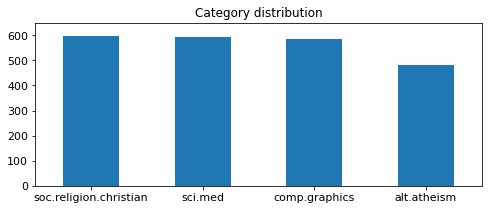

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    273
sci.med                   261
comp.graphics             256
alt.atheism               210
Name: category_name, dtype: int64


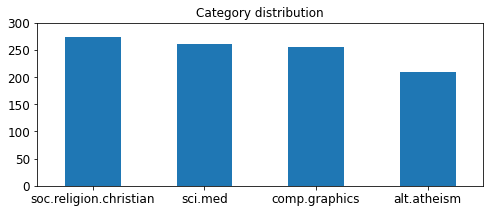

In [31]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

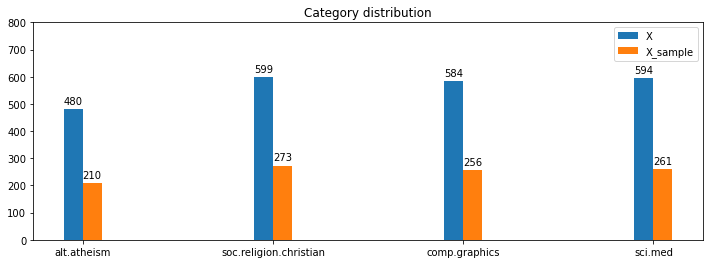

In [32]:
category_numpy = np.arange(len(categories))

bar_width = 0.1

fig, axes = plt.subplots(figsize = (12,4))


rects1 = axes.bar(category_numpy-bar_width/2
                 , X.category_name.value_counts().reindex(index = categories)
                 , bar_width
                 , label = 'X')

rects2 = axes.bar(category_numpy+bar_width/2
                 , X_sample.category_name.value_counts().reindex(index = categories)
                 , bar_width
                 , label = 'X_sample')


axes.set_title('Category distribution')
axes.set_xticks(category_numpy)
axes.set_xticklabels(categories)
axes.set_ylim(top=800)
axes.legend()
    
    
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
    
plt.show()

As we can see, I reindex the result of value_counts. Since the order of the result of value_counts is not equal to categories, the labels on x-axis. It's a necessary step to draw this bar chart.

### Exercise 10

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Use numpy.where to find the index of the second 1 in the fifth row.

In [34]:
result = np.where(X_counts[4, 0:100].toarray() == 1)
print(result)

(array([0, 0]), array([ 0, 37]))


As we can see, the second 1's index is 37 in that row. Let's go to see what's the term with index 37 in the count_vect.feature_names().

In [35]:
print(count_vect.get_feature_names()[37])

01


Another 1 in X_count\[0:5\]\[0:100\] represent '01'!

### Exercise 11

As we can see, X_counts has a lot of elements which are equal to zero. That is, there will be a lot of terms appearing very few times. To visualize the meaningful representation efficiently, I think I can drop the columns(terms) that appear too few times.

In [36]:
sum_of_columns = X_counts.sum(axis=0)

sum_of_columns = np.squeeze(np.asarray(sum_of_columns))

term_mask = sum_of_columns > 1000

plot_x = ["term_"+str(i) for i in np.array(count_vect.get_feature_names())[term_mask]]

plot_y = ["doc_"+ str(i) for i in list(X.index)[:]]

plot_z = X_counts[:,term_mask].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)


df_todraw.shape



(2257, 77)

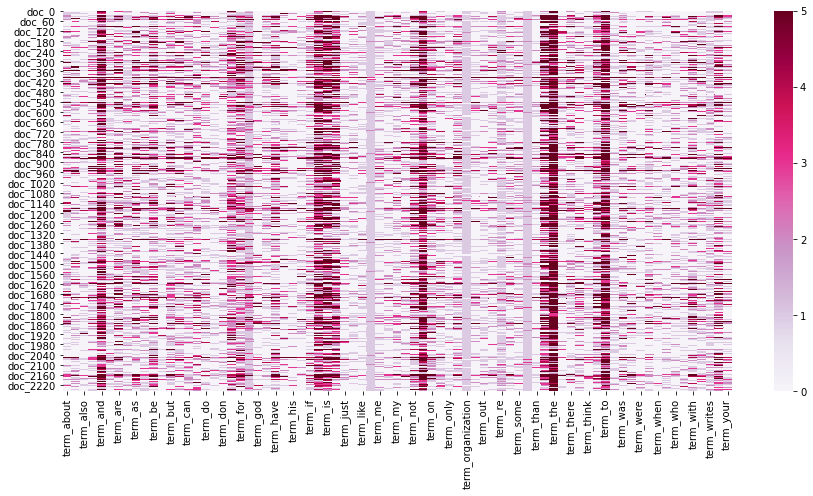

In [37]:
import seaborn as sns

plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=False)

### Exercise 12

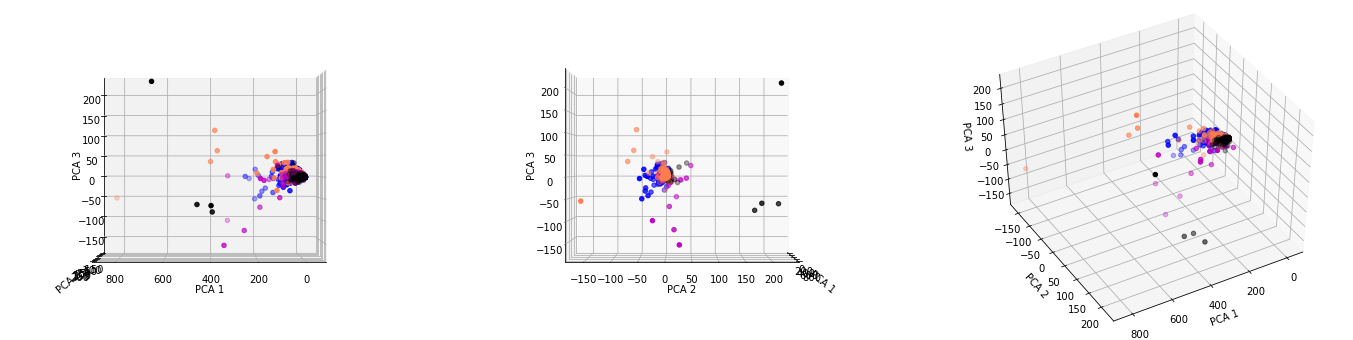

In [38]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits import mplot3d


col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize=(24,6))

ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')    
ax.view_init(0, 90)


ax = fig.add_subplot(1, 3, 2, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
ax.view_init(0, 0)
    
    
ax = fig.add_subplot(1, 3, 3, projection='3d')


for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3') 
ax.view_init(45, 60)

First, I observe that data's variance on PCA1 axis has the largest variance. And data's variance on PCA3 axis has the smallest variance. (Quite obvious since the scales.)

I also observe that, although the data points reside really close, there are actually some clusterings of different categories.

### Exercise 13

In [39]:
import plotly.express as px

In [40]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [41]:
fig = px.bar(count_vect.get_feature_names()[:500],y=term_frequencies[:500])

fig.update_layout(
    title="Term Frequency",
    xaxis_title="Term",
    yaxis_title="Frequency",
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(count_vect.get_feature_names()[:500]))),
        ticktext = count_vect.get_feature_names()[:500],)
)

fig.update_xaxes(tickfont=dict(family='Rockwell', size=2))

fig.show()

### Exercise 14

In [42]:
#Set a frequency threshold, just select those has more frequency than threshold

threshold = 100

mask = term_frequencies>threshold

term_freq_sel = term_frequencies[mask]

len(term_freq_sel)

801

In [43]:
#And then we will apply the mask on the count_vect.get_feature_names(),too.
#To get the 'above threshold' feature name

feature_sel = np.array(count_vect.get_feature_names())[mask]

len(feature_sel)

801

In [44]:
fig = px.bar(feature_sel[:300],y=term_freq_sel[:300])

fig.update_layout(
    title="Term Frequency",
    xaxis_title="Term",
    yaxis_title="Frequency",
    xaxis = dict(
        tickmode = 'array',
        tickvals = list(range(len(feature_sel[:300]))),
        ticktext = feature_sel[:300],)
)

fig.update_xaxes(tickfont=dict(family='Rockwell', size=2))

fig.show()

### Exercise 15

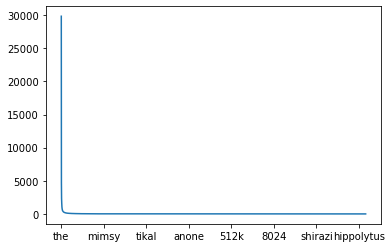

In [45]:
# Form a Series using term_frequencies and count_vect.get_feature_names()

freq_series = pd.Series(term_frequencies, index=count_vect.get_feature_names())

# Plot the result after sorting

freq_series.sort_values(ascending=False).plot()


### Exercise 16

In [46]:
from sklearn import preprocessing

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [47]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [48]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

I found that generating the binarization using the category_name column instead works!.

I think it's pretty obvious why this works. Since we just turn the field, category into the field,category_name.

Both of them are 'category' attributes, and they represent the same thing. And we can find that the one-hot encoding is the same as the one in lab. 

(Since 0=alt.atheism, 1=comp.graphics, 2=sci.med, 3=soc.religion.christian)

## Part 2, New dataset

### Data Preparation

In [49]:
# Load the data

part2_columns = ['sentence', 'score']

path = 'sentiment labelled sentences/'

file1 = 'amazon_cells_labelled.txt'

file2 = 'imdb_labelled.txt'

file3 = 'yelp_labelled.txt'

df_amazon = pd.read_table(path+file1, sep='\t|\n', names = part2_columns, header=None, engine='python')

df_imdb = pd.read_table(path+file2, sep='\t|\n', names = part2_columns, header=None, engine='python')

df_yelp = pd.read_table(path+file3, sep='\t|\n', names = part2_columns, header=None, engine='python')

In [50]:
# Adding a column named source in the dataframe

df_amazon['source'] = 'Amazon'
df_amazon

sentence  score  source
0    So there is no way for me to plug it in here i...      0  Amazon
1                          Good case, Excellent value.      1  Amazon
2                               Great for the jawbone.      1  Amazon
3    Tied to charger for conversations lasting more...      0  Amazon
4                                    The mic is great.      1  Amazon
..                                                 ...    ...     ...
995  The screen does get smudged easily because it ...      0  Amazon
996  What a piece of junk.. I lose more calls on th...      0  Amazon
997                       Item Does Not Match Picture.      0  Amazon
998  The only thing that disappoint me is the infra...      0  Amazon
999  You can not answer calls with the unit, never ...      0  Amazon

[1000 rows x 3 columns]

In [51]:
df_imdb['source'] = 'imdb'
df_imdb

sentence  score source
0    A very, very, very slow-moving, aimless movie ...      0   imdb
1    Not sure who was more lost - the flat characte...      0   imdb
2    Attempting artiness with black & white and cle...      0   imdb
3         Very little music or anything to speak of.        0   imdb
4    The best scene in the movie was when Gerardo i...      1   imdb
..                                                 ...    ...    ...
995  I just got bored watching Jessice Lange take h...      0   imdb
996  Unfortunately, any virtue in this film's produ...      0   imdb
997                   In a word, it is embarrassing.        0   imdb
998                               Exceptionally bad!        0   imdb
999  All in all its an insult to one's intelligence...      0   imdb

[1000 rows x 3 columns]

In [52]:
df_yelp['source'] = 'yelp'
df_yelp

sentence  score source
0                             Wow... Loved this place.      1   yelp
1                                   Crust is not good.      0   yelp
2            Not tasty and the texture was just nasty.      0   yelp
3    Stopped by during the late May bank holiday of...      1   yelp
4    The selection on the menu was great and so wer...      1   yelp
..                                                 ...    ...    ...
995  I think food should have flavor and texture an...      0   yelp
996                           Appetite instantly gone.      0   yelp
997  Overall I was not impressed and would not go b...      0   yelp
998  The whole experience was underwhelming, and I ...      0   yelp
999  Then, as if I hadn't wasted enough of my life ...      0   yelp

[1000 rows x 3 columns]

In [53]:
df_concat = pd.concat([df_amazon,df_imdb,df_yelp],ignore_index=True)

df_concat

sentence  score  source
0     So there is no way for me to plug it in here i...      0  Amazon
1                           Good case, Excellent value.      1  Amazon
2                                Great for the jawbone.      1  Amazon
3     Tied to charger for conversations lasting more...      0  Amazon
4                                     The mic is great.      1  Amazon
...                                                 ...    ...     ...
2995  I think food should have flavor and texture an...      0    yelp
2996                           Appetite instantly gone.      0    yelp
2997  Overall I was not impressed and would not go b...      0    yelp
2998  The whole experience was underwhelming, and I ...      0    yelp
2999  Then, as if I hadn't wasted enough of my life ...      0    yelp

[3000 rows x 3 columns]

### Add a column called rate, if score = 1, rate is positive, else rate is negative

In [54]:
def score_to_rate(score):
    if score == 1:
        return 'positive'
    else:
        return 'negative'

df_concat['rate'] = df_concat.score.apply(lambda t: score_to_rate(t))

df_concat

sentence  score  source  \
0     So there is no way for me to plug it in here i...      0  Amazon   
1                           Good case, Excellent value.      1  Amazon   
2                                Great for the jawbone.      1  Amazon   
3     Tied to charger for conversations lasting more...      0  Amazon   
4                                     The mic is great.      1  Amazon   
...                                                 ...    ...     ...   
2995  I think food should have flavor and texture an...      0    yelp   
2996                           Appetite instantly gone.      0    yelp   
2997  Overall I was not impressed and would not go b...      0    yelp   
2998  The whole experience was underwhelming, and I ...      0    yelp   
2999  Then, as if I hadn't wasted enough of my life ...      0    yelp   

          rate  
0     negative  
1     positive  
2     positive  
3     negative  
4     positive  
...        ...  
2995  negative  
2996  negative  
2997  negative  
2998  negative  
2999  negative  

[3000 rows x 4 columns]

### Get familiar with data

In [55]:
df_concat[0:3]

sentence  score  source      rate
0  So there is no way for me to plug it in here i...      0  Amazon  negative
1                        Good case, Excellent value.      1  Amazon  positive
2                             Great for the jawbone.      1  Amazon  positive

In [56]:
for t in df_concat['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


In [57]:
df_concat[:10][['sentence','source']]

sentence  source
0  So there is no way for me to plug it in here i...  Amazon
1                        Good case, Excellent value.  Amazon
2                             Great for the jawbone.  Amazon
3  Tied to charger for conversations lasting more...  Amazon
4                                  The mic is great.  Amazon
5  I have to jiggle the plug to get it to line up...  Amazon
6  If you have several dozen or several hundred c...  Amazon
7        If you are Razr owner...you must have this!  Amazon
8                Needless to say, I wasted my money.  Amazon
9                   What a waste of money and time!.  Amazon

In [58]:
df_concat[-10:]

sentence  score source  \
2990  The refried beans that came with my meal were ...      0   yelp   
2991         Spend your money and time some place else.      0   yelp   
2992  A lady at the table next to us found a live gr...      0   yelp   
2993            the presentation of the food was awful.      0   yelp   
2994           I can't tell you how disappointed I was.      0   yelp   
2995  I think food should have flavor and texture an...      0   yelp   
2996                           Appetite instantly gone.      0   yelp   
2997  Overall I was not impressed and would not go b...      0   yelp   
2998  The whole experience was underwhelming, and I ...      0   yelp   
2999  Then, as if I hadn't wasted enough of my life ...      0   yelp   

          rate  
2990  negative  
2991  negative  
2992  negative  
2993  negative  
2994  negative  
2995  negative  
2996  negative  
2997  negative  
2998  negative  
2999  negative

In [59]:
df_concat.iloc[::150, 0:3][0:10]

sentence  score  source
0     So there is no way for me to plug it in here i...      0  Amazon
150                              I Was Hoping for More.      0  Amazon
300                                    Sending it back.      0  Amazon
450   i'm glad i found this product on amazon it is ...      1  Amazon
600   Their Research and Development division obviou...      1  Amazon
750   It is light, has plenty of battery capacity, a...      1  Amazon
900   This was utterly confusing at first, which cau...      0  Amazon
1050  I'm glad the film didn't go for the most obvio...      1    imdb
1200          This is definitely one of the bad ones.        0    imdb
1350           Everything about this movie is stupid.        0    imdb

In [60]:
df_concat[::100][0:20]

sentence  score  source  \
0     So there is no way for me to plug it in here i...      0  Amazon   
100   Integrated seamlessly with the Motorola RAZR p...      1  Amazon   
200   The color is even prettier than I thought it w...      1  Amazon   
300                                    Sending it back.      0  Amazon   
400                               what a disappointment      0  Amazon   
500   The bose noise cancelling is amazing, which is...      1  Amazon   
600   Their Research and Development division obviou...      1  Amazon   
700   Also, the phone doesn't seem to accept anythin...      0  Amazon   
800                                  Good , works fine.      1  Amazon   
900   This was utterly confusing at first, which cau...      0  Amazon   
1000  A very, very, very slow-moving, aimless movie ...      0    imdb   
1100          I don't think you will be disappointed.        1    imdb   
1200          This is definitely one of the bad ones.        0    imdb   
1300  I recommend this for EVERYONE who loves film, ...      1    imdb   
1400  A good commentary of today's love and undoubte...      1    imdb   
1500  The entire audience applauded at the conclusio...      1    imdb   
1600  Perabo has a nice energy level and is obviousl...      1    imdb   
1700  It is a film about nothing, just a pretext to ...      0    imdb   
1800  In fact, this stinker smells like a direct-to-...      0    imdb   
1900   Otherwise, don't even waste your time on this.        0    imdb   

          rate  
0     negative  
100   positive  
200   positive  
300   negative  
400   negative  
500   positive  
600   positive  
700   negative  
800   positive  
900   negative  
1000  negative  
1100  positive  
1200  negative  
1300  positive  
1400  positive  
1500  positive  
1600  positive  
1700  negative  
1800  negative  
1900  negative

## Data Mining using panda

### Check missing values

In [61]:
df_concat.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
source      (The amoung of missing records is: , 0)
rate        (The amoung of missing records is: , 0)
dtype: object

### Dealing with Duplicate Data

In [62]:
dup_boolean = df_concat.duplicated()

In [63]:
sum(df_concat.duplicated())

17

In [64]:
df_concat[dup_boolean]

sentence  score  source  \
285                                       Great phone!.      1  Amazon   
407                                        Works great.      1  Amazon   
524                                       Works great!.      1  Amazon   
543                             Don't buy this product.      0  Amazon   
744   If you like a loud buzzing to override all you...      0  Amazon   
748                                       Does not fit.      0  Amazon   
778                               This is a great deal.      1  Amazon   
792                                        Great Phone.      1  Amazon   
892                    Excellent product for the price.      1  Amazon   
896                                        Great phone.      1  Amazon   
1363                   Definitely worth checking out.        1    imdb   
1585                                 Not recommended.        0    imdb   
1788                                            10/10        1    imdb   
2814                                 I love this place.      1    yelp   
2816                             The food was terrible.      0    yelp   
2843                                   I won't be back.      0    yelp   
2846                  I would not recommend this place.      0    yelp   

          rate  
285   positive  
407   positive  
524   positive  
543   negative  
744   negative  
748   negative  
778   positive  
792   positive  
892   positive  
896   positive  
1363  positive  
1585  negative  
1788  positive  
2814  positive  
2816  negative  
2843  negative  
2846  negative

In [65]:
df_concat[df_concat['sentence'] == 'Great phone!.']

sentence  score  source      rate
187  Great phone!.      1  Amazon  positive
285  Great phone!.      1  Amazon  positive

Find that there are duplicated rows in the dataframe. I would try to remove the duplicated rows.

In [66]:
df_concat.drop_duplicates(keep='first',inplace=True)

df_concat.shape

(2983, 4)

In [67]:
sum(df_concat.duplicated())

0

Since we drop some rows, the indices don't match the rows.

We may use reset_index to reset the indices.

In [68]:
df_concat.reset_index(drop=True, inplace=True)

## Data Pre-processing

### sampling

In [69]:
df_sample = df_concat.sample(n=1000)

df_sample

sentence  score  source  \
634   I used bitpim (a free program you can find on ...      1  Amazon   
957                           Beautiful styling though.      1  Amazon   
2759  the food is not tasty at all, not to say its "...      0    yelp   
2434                               Sauce was tasteless.      0    yelp   
1084  The only suspense I was feeling was the frustr...      0    imdb   
...                                                 ...    ...     ...   
2914  If you want to wait for mediocre food and down...      0    yelp   
2286  The food was excellent and service was very good.      1    yelp   
2382  To summarize... the food was incredible, nay, ...      1    yelp   
1974  This movie is well-balanced with comedy and dr...      1    imdb   
1622  He really didn't seem to want to be hosting; h...      0    imdb   

          rate  
634   positive  
957   positive  
2759  negative  
2434  negative  
1084  negative  
...        ...  
2914  negative  
2286  positive  
2382  positive  
1974  positive  
1622  negative  

[1000 rows x 4 columns]

negative    1493
positive    1490
Name: rate, dtype: int64


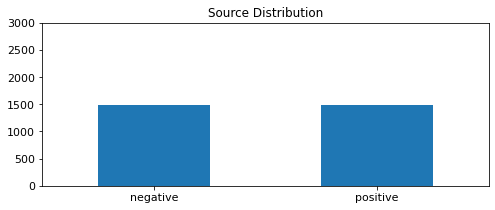

In [70]:
print(df_concat.rate.value_counts())

df_concat.rate.value_counts().plot(kind = 'bar',
                                     title = 'Source Distribution',
                                     ylim = [0,3000],
                                     rot = 0, fontsize = 11, figsize = (8,3))

negative    507
positive    493
Name: rate, dtype: int64


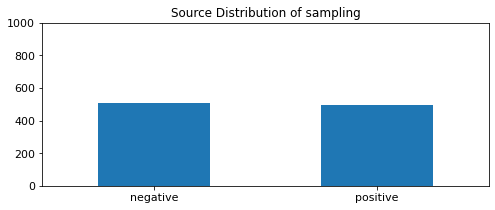

In [71]:
print(df_sample.rate.value_counts())

df_sample.rate.value_counts().plot(kind = 'bar',
                                   title = 'Source Distribution of sampling',
                                   ylim = [0,1000],
                                   rot = 0, fontsize = 11, figsize = (8,3))

### Feature Creation

In [72]:
import nltk

df_concat['unigrams'] = df_concat['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [73]:
df_concat[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [74]:
df_concat[0:4]

sentence  score  source      rate  \
0  So there is no way for me to plug it in here i...      0  Amazon  negative   
1                        Good case, Excellent value.      1  Amazon  positive   
2                             Great for the jawbone.      1  Amazon  positive   
3  Tied to charger for conversations lasting more...      0  Amazon  negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

In [75]:
list(df_concat[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [76]:
count_vect = CountVectorizer()

df_counts = count_vect.fit_transform(df_concat.sentence)

df_counts.shape

(2983, 5155)

In [77]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [78]:
df_counts[0:5][:].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_y = ["doc_"+ str(i) for i in list(df_concat.index)[0:50]]
plot_z = df_counts[0:50, 0:50].toarray()

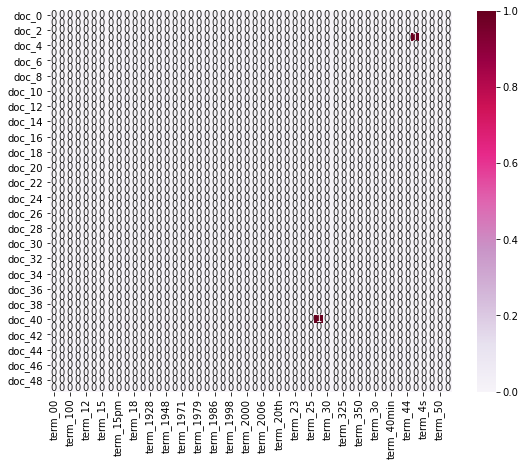

In [80]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimension Reduction

In [81]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

df_reduced.shape

(2983, 2)

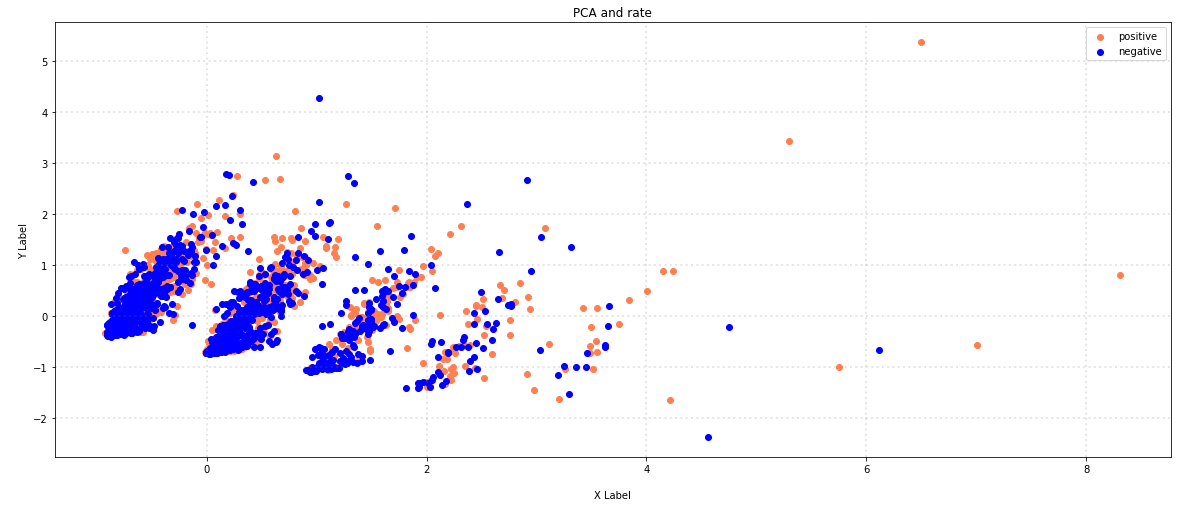

In [82]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, rate in zip(col, ['positive', 'negative']):
    xs = df_reduced[df_concat['rate'] == rate].T[0]
    ys = df_reduced[df_concat['rate'] == rate].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', label = rate)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_title('PCA and rate')
ax.legend()
plt.show()

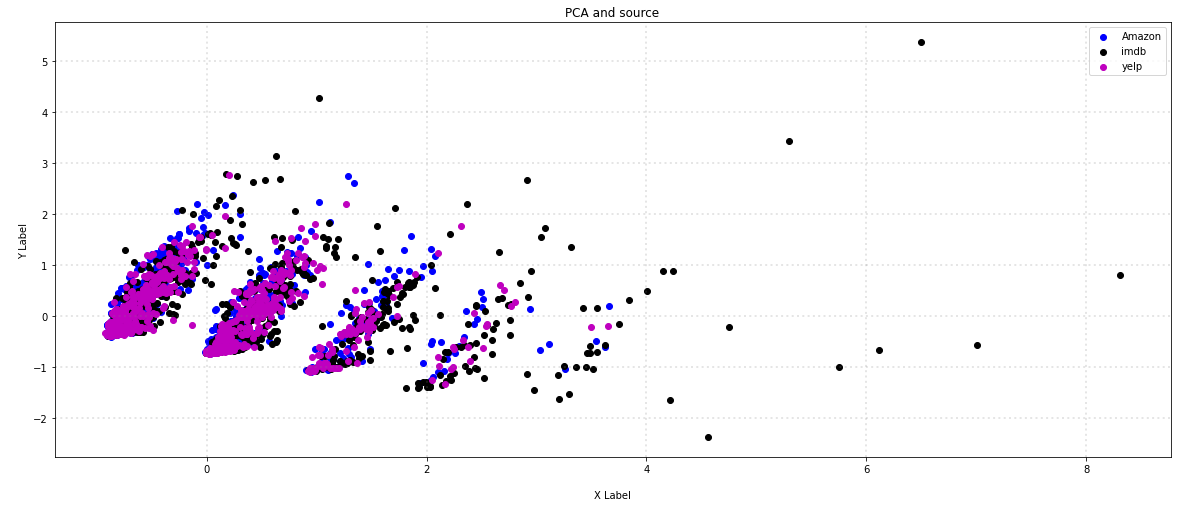

In [83]:
col = ['blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, src in zip(col, ['Amazon', 'imdb', 'yelp']):
    xs = df_reduced[df_concat['source'] == src].T[0]
    ys = df_reduced[df_concat['source'] == src].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o', label = src)

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_title('PCA and source')
ax.legend()
plt.show()

The first figure I plot is according to PCA and the rate is positive or negative.

The second one is according to PCA and the source.

### Attribute transformation/Aggregation

In [84]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))
    
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]



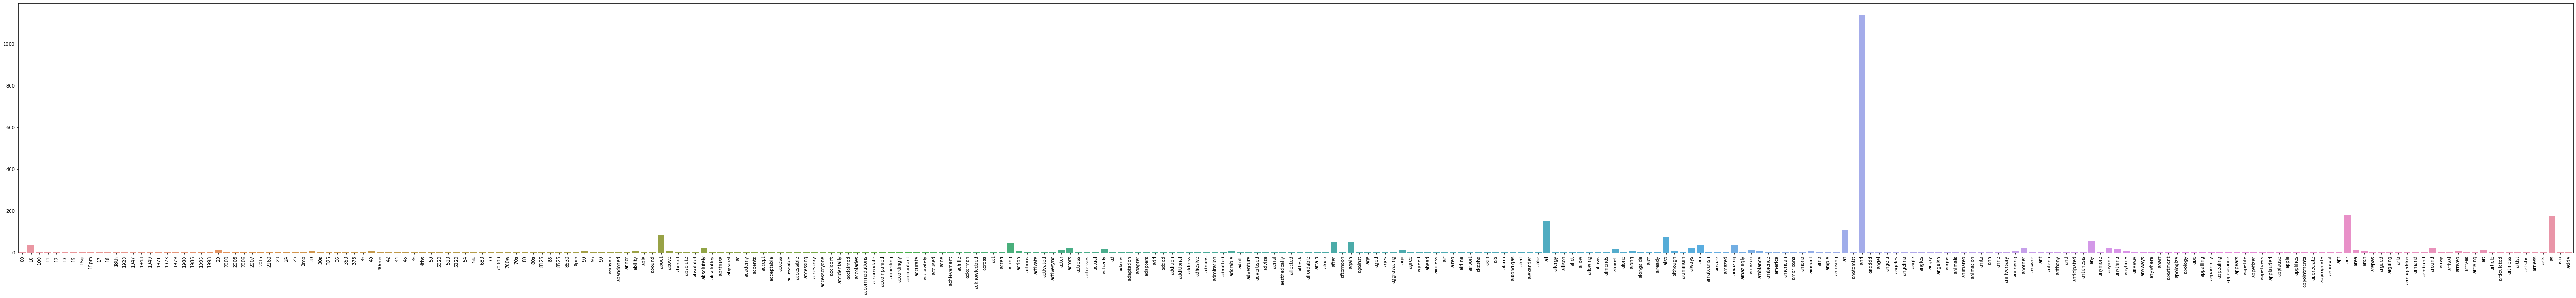

In [85]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

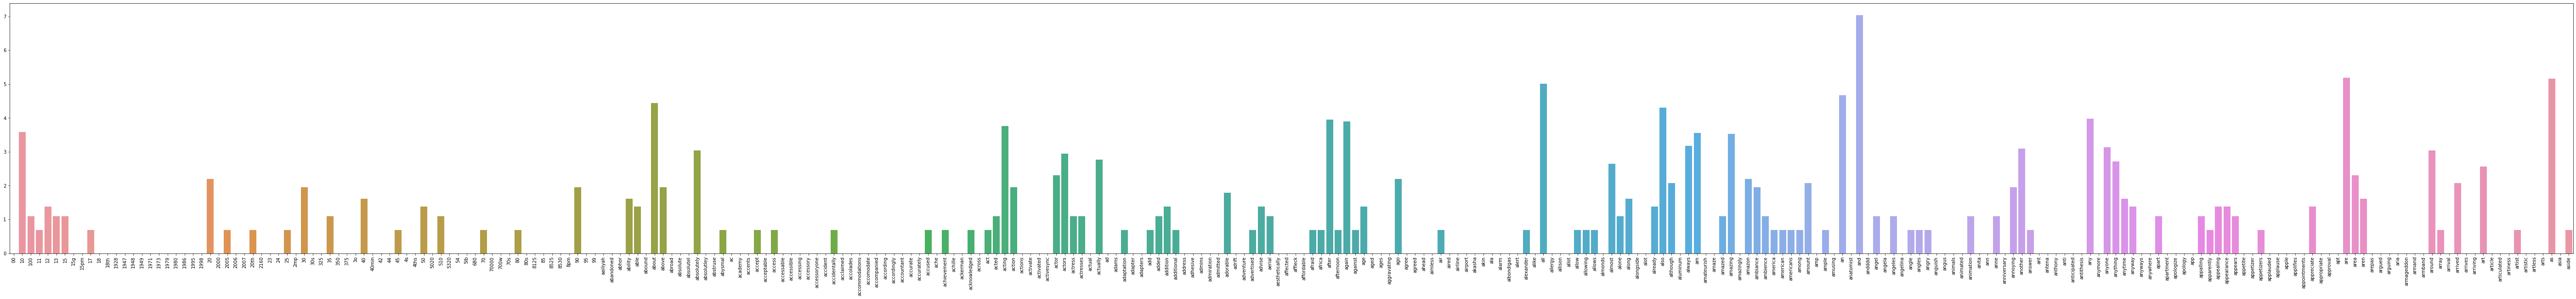

In [86]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### Discretization and Binarization

I will first one-hot encode the source.

In [87]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_concat.source)
mlb.classes_

array(['Amazon', 'imdb', 'yelp'], dtype='<U6')

In [88]:
df_concat['bin_source'] = mlb.transform(df_concat['source']).tolist()

df_concat

sentence  score  source  \
0     So there is no way for me to plug it in here i...      0  Amazon   
1                           Good case, Excellent value.      1  Amazon   
2                                Great for the jawbone.      1  Amazon   
3     Tied to charger for conversations lasting more...      0  Amazon   
4                                     The mic is great.      1  Amazon   
...                                                 ...    ...     ...   
2978  I think food should have flavor and texture an...      0    yelp   
2979                           Appetite instantly gone.      0    yelp   
2980  Overall I was not impressed and would not go b...      0    yelp   
2981  The whole experience was underwhelming, and I ...      0    yelp   
2982  Then, as if I hadn't wasted enough of my life ...      0    yelp   

          rate                                           unigrams bin_source  
0     negative  [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1     positive               [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2     positive                      [Great, for, the, jawbone, .]  [1, 0, 0]  
3     negative  [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]  
4     positive                           [The, mic, is, great, .]  [1, 0, 0]  
...        ...                                                ...        ...  
2978  negative  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]  
2979  negative                     [Appetite, instantly, gone, .]  [0, 0, 1]  
2980  negative  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]  
2981  negative  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]  
2982  negative  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]  

[2983 rows x 6 columns]

How about do this on rate 

In [89]:
mlb.fit(df_concat.rate)
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [90]:
df_concat['bin_rate'] = mlb.transform(df_concat['rate']).tolist()

df_concat

sentence  score  source  \
0     So there is no way for me to plug it in here i...      0  Amazon   
1                           Good case, Excellent value.      1  Amazon   
2                                Great for the jawbone.      1  Amazon   
3     Tied to charger for conversations lasting more...      0  Amazon   
4                                     The mic is great.      1  Amazon   
...                                                 ...    ...     ...   
2978  I think food should have flavor and texture an...      0    yelp   
2979                           Appetite instantly gone.      0    yelp   
2980  Overall I was not impressed and would not go b...      0    yelp   
2981  The whole experience was underwhelming, and I ...      0    yelp   
2982  Then, as if I hadn't wasted enough of my life ...      0    yelp   

          rate                                           unigrams bin_source  \
0     negative  [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]   
1     positive               [Good, case, ,, Excellent, value, .]  [1, 0, 0]   
2     positive                      [Great, for, the, jawbone, .]  [1, 0, 0]   
3     negative  [Tied, to, charger, for, conversations, lastin...  [1, 0, 0]   
4     positive                           [The, mic, is, great, .]  [1, 0, 0]   
...        ...                                                ...        ...   
2978  negative  [I, think, food, should, have, flavor, and, te...  [0, 0, 1]   
2979  negative                     [Appetite, instantly, gone, .]  [0, 0, 1]   
2980  negative  [Overall, I, was, not, impressed, and, would, ...  [0, 0, 1]   
2981  negative  [The, whole, experience, was, underwhelming, ,...  [0, 0, 1]   
2982  negative  [Then, ,, as, if, I, had, n't, wasted, enough,...  [0, 0, 1]   

     bin_rate  
0         [0]  
1         [1]  
2         [1]  
3         [0]  
4         [1]  
...       ...  
2978      [0]  
2979      [0]  
2980      [0]  
2981      [0]  
2982      [0]  

[2983 rows x 7 columns]

I found something interesting. That is,  the score is the same binary representation with bin_rate!

## Data Exploration

In [91]:
# Pick three rows, to see the sentences of them

document_to_transform_1 = []
random_record_1 = df_concat.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_concat.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_concat.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [92]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [93]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part 3, new data visualization, TF-IDF, Bayes Classifier

### Let's try to visualize the cosine similarity

In [94]:
document_vector_count_bin_list = []

document_vector_count_bin_record_name = []

for i in range(df_concat.shape[0]):
    document_to_transform = []
    document_to_transform.append(df_concat.iloc[i]['sentence'])
    document_vector_count_bin_list.append(binarize(count_vect.transform(document_to_transform)).A.squeeze().tolist())
    document_vector_count_bin_record_name.append("doc_" + str(i))


In [95]:
df_to_compute_similarity = pd.DataFrame(np.array(document_vector_count_bin_list))

# Calculate the similarity of each row

similarity_matrix = cosine_similarity(df_to_compute_similarity)



In [96]:
# Construct a dataframe of similarity_matrix

df_similarity = pd.DataFrame(similarity_matrix,
                             columns=document_vector_count_bin_record_name,
                             index=document_vector_count_bin_record_name)

df_similarity.head()

doc_0  doc_1     doc_2     doc_3     doc_4     doc_5     doc_6  \
doc_0  1.000000    0.0  0.235702  0.136083  0.235702  0.272166  0.111111   
doc_1  0.000000    1.0  0.000000  0.000000  0.000000  0.000000  0.000000   
doc_2  0.235702    0.0  1.000000  0.144338  0.500000  0.144338  0.117851   
doc_3  0.136083    0.0  0.144338  1.000000  0.000000  0.083333  0.000000   
doc_4  0.235702    0.0  0.500000  0.000000  1.000000  0.144338  0.117851   

       doc_7     doc_8  doc_9  ...  doc_2973  doc_2974  doc_2975  doc_2976  \
doc_0    0.0  0.096225    0.0  ...  0.058926       0.0  0.251976  0.096225   
doc_1    0.0  0.000000    0.0  ...  0.000000       0.0  0.000000  0.000000   
doc_2    0.0  0.000000    0.0  ...  0.125000       0.0  0.133631  0.204124   
doc_3    0.0  0.117851    0.0  ...  0.000000       0.0  0.077152  0.000000   
doc_4    0.0  0.000000    0.0  ...  0.125000       0.0  0.133631  0.204124   

       doc_2977  doc_2978  doc_2979  doc_2980  doc_2981  doc_2982  
doc_0       0.0       0.0       0.0  0.083333  0.176777  0.282843  
doc_1       0.0       0.0       0.0  0.000000  0.000000  0.000000  
doc_2       0.0       0.0       0.0  0.000000  0.125000  0.100000  
doc_3       0.0       0.0       0.0  0.000000  0.072169  0.057735  
doc_4       0.0       0.0       0.0  0.000000  0.125000  0.100000  

[5 rows x 2983 columns]

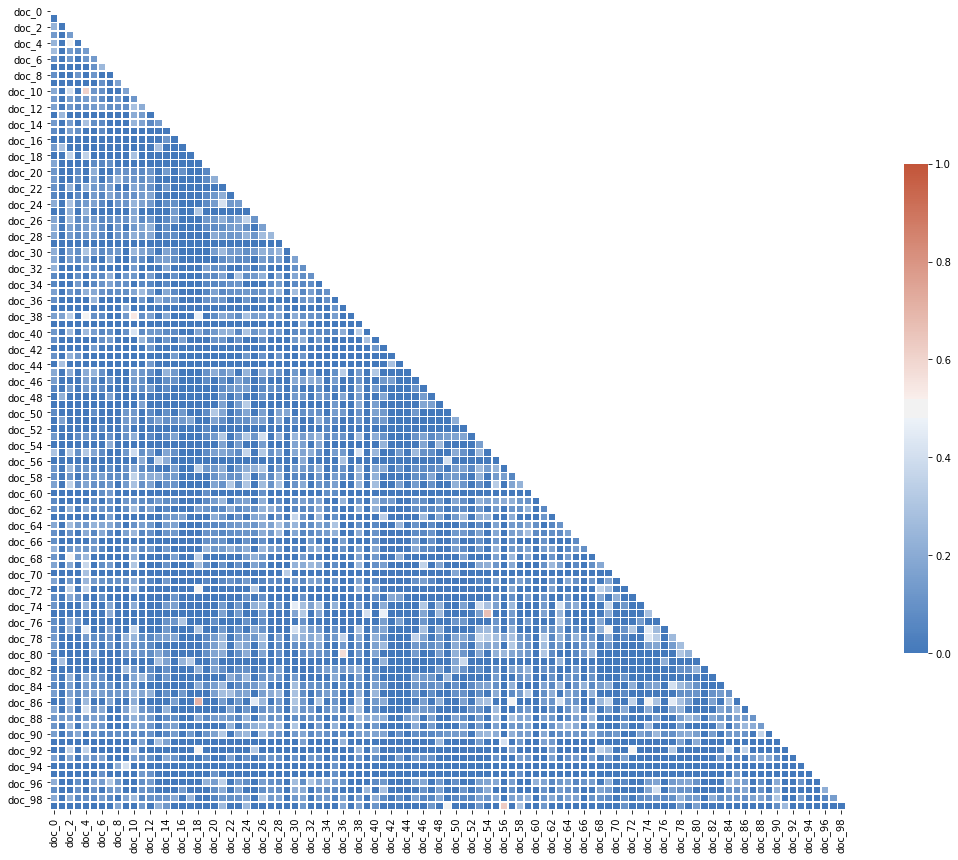

In [97]:
f, ax = plt.subplots(figsize=(18, 18))

cmap = sns.diverging_palette(250, 20, as_cmap=True)

mask = np.zeros_like(pd.DataFrame(df_similarity.iloc[:100,:100]), dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(pd.DataFrame(df_similarity.iloc[:100,:100]), mask=mask, cmap=cmap, center=0.5, 
            square=True, linewidths=.5, fmt='.2f', 
            annot=False, cbar_kws={"shrink": .5}, vmax=1)
    

According to the picture I draw above, we can see that sentence in document 54 has high similarity with document 75.

Let's see what are their setences.

In [98]:
print("Sentence of doc_54: " + df_concat.loc[54,'sentence'])

print("Sentence of doc_75: " + df_concat.loc[75,'sentence'])

print("Similarity of doc_54 and doc_75: " + str(df_similarity.iloc[54,75]))

Sentence of doc_54: I love this thing!
Sentence of doc_75: Love this product.
Similarity of doc_54 and doc_75: 0.6666666666666669


With these similarity heatmap, we may find the relationship between similarity in sentence and similarity in score (or rate).

In [99]:
print("Score of doc_54: " + str(df_concat.loc[54,'score']))

print("Score of doc_75: " + str(df_concat.loc[75,'score']))

Score of doc_54: 1
Score of doc_75: 1


### Visualize the relationship between similarity of sentence and equality of score

In [100]:
score_list = df_concat['score'].tolist()
score_array = np.array(score_list)
score_array = score_array[:,np.newaxis]
df_score = pd.DataFrame(score_array)

In [101]:
from sklearn.metrics import pairwise_distances
score_similarity_matrix = pairwise_distances(df_score)
df_score_similarity = pd.DataFrame(score_similarity_matrix,
                                   columns = document_vector_count_bin_record_name,
                                   index = document_vector_count_bin_record_name)

df_score_similarity = df_score_similarity.replace({0:1, 1:0})

print("df_score_similarity")
df_score_similarity.head()

df_score_similarity


doc_0  doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7  doc_8  doc_9  \
doc_0    1.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0   
doc_1    0.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
doc_2    0.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
doc_3    1.0    0.0    0.0    1.0    0.0    1.0    1.0    0.0    1.0    1.0   
doc_4    0.0    1.0    1.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   

       ...  doc_2973  doc_2974  doc_2975  doc_2976  doc_2977  doc_2978  \
doc_0  ...       1.0       1.0       1.0       1.0       1.0       1.0   
doc_1  ...       0.0       0.0       0.0       0.0       0.0       0.0   
doc_2  ...       0.0       0.0       0.0       0.0       0.0       0.0   
doc_3  ...       1.0       1.0       1.0       1.0       1.0       1.0   
doc_4  ...       0.0       0.0       0.0       0.0       0.0       0.0   

       doc_2979  doc_2980  doc_2981  doc_2982  
doc_0       1.0       1.0       1.0       1.0  
doc_1       0.0       0.0       0.0       0.0  
doc_2       0.0       0.0       0.0       0.0  
doc_3       1.0       1.0       1.0       1.0  
doc_4       0.0       0.0       0.0       0.0  

[5 rows x 2983 columns]

Since we need to take care of the (0,0) pair, whose result will be zero if calculated by cosine_similarity, we use distance metric, and flip 0->1, 1->0.

In [102]:
num_sentence_similarity = [0,0]
num_score_inequlity = [0,0]
num_score_equlity = [0,0]

for i in range(df_similarity.shape[0]):
    series = df_similarity.iloc[i]
    series = series[df_similarity.iloc[i] >= 0.5]
    num_sentence_similarity[0] = num_sentence_similarity[0] + series.size
    
    score_series = df_score_similarity.iloc[i]
    score_series = score_series[df_similarity.iloc[i] >= 0.5]
    num_score_equlity[0] = num_score_equlity[0] + score_series.sum()
    
    score_series = df_score_similarity.iloc[i]
    score_series = score_series[df_similarity.iloc[i] >= 0.5]
    num_score_inequlity[0] = num_score_inequlity[0] + (score_series.size - score_series.sum())


num_sentence_similarity[0] = num_sentence_similarity[0] - df_similarity.shape[0]
num_score_equlity[0] = num_score_equlity[0] - df_similarity.shape[0]
print("num_sentence_similarity_high: " + str(num_sentence_similarity[0]/2))
print("num_score_equality_similarity_high: " + str(num_score_equlity[0]/2))
print("num_score_inequlity_similarity_high: " + str(num_score_inequlity[0]/2))

for i in range(df_similarity.shape[0]):
    series = df_similarity.iloc[i]
    series = series[df_similarity.iloc[i] < 0.5]
    num_sentence_similarity[1] = num_sentence_similarity[1] + series.size
    
    score_series = df_score_similarity.iloc[i]
    score_series = score_series[df_similarity.iloc[i] < 0.5]
    num_score_equlity[1] = num_score_equlity[1] + score_series.sum()
    
    score_series = df_score_similarity.iloc[i]
    score_series = score_series[df_similarity.iloc[i] < 0.5]
    num_score_inequlity[1] = num_score_inequlity[1] + (score_series.size - score_series.sum())

print("num_sentence_similarity_low: " + str(num_sentence_similarity[1]/2))
print("num_score_equality_similarity_low: " + str(num_score_equlity[1]/2))
print("num_score_inequlity_similarity_low: " + str(num_score_inequlity[1]/2))




num_sentence_similarity_high: 2150.0
num_score_equality_similarity_high: 1581.0
num_score_inequlity_similarity_high: 569.0
num_sentence_similarity_low: 4445503.0
num_score_equality_similarity_low: 2221502.0
num_score_inequlity_similarity_low: 2224001.0


Text(0.5, 1.0, 'sentence similarity < 0.5')

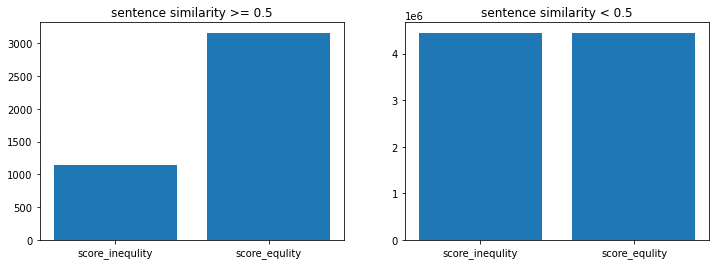

In [103]:
x_labels = ['score_inequlity','score_equlity']

fig, axes = plt.subplots(1,2,figsize = (12,4))
axes[0].bar(x_labels,list([num_score_inequlity[0], num_score_equlity[0]]))
axes[0].set_title('sentence similarity >= 0.5')

axes[1].bar(x_labels, list([num_score_inequlity[1], num_score_equlity[1]]))
axes[1].set_title('sentence similarity < 0.5')

We can see that if items have high setence similarity, the trend is that they are more likely have equality in score. And if two items have low setence similarity, the probability of having same score is maximum randomness (0.5).

### Visualize the top 50 terms in the dataset

In the lab, we just plot out the frequency of each term. But since there are too many terms, the plotting isn't very useful. 

I think I can plot out the terms that have the highest (top 50) frequency among all the vocabularies.

In [104]:
# First, construct a dict term_freq_dict, key: term, value: freq

term_freq_dict = {}

for term, freq in zip(count_vect.get_feature_names(),term_frequencies):
    term_freq_dict[term] = freq
    
# Sort term_freq_dict in decending order by frequency
sorted_term_freq = sorted(term_freq_dict.items(), key=lambda x:x[1], reverse=True)


In [105]:
top_50_term = []
for i in range(50):
    top_50_term.append(sorted_term_freq[i][0])

top_50_freq = []

for i in range(50):
    top_50_freq.append(sorted_term_freq[i][1])
    

<BarContainer object of 50 artists>

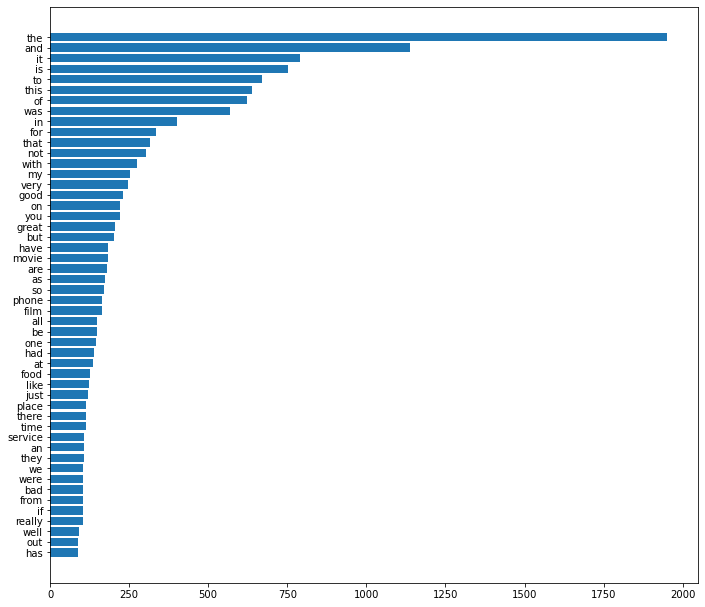

In [106]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,2])

ax.barh(list(reversed(top_50_term)), list(reversed(top_50_freq)))

As we can see, 'the' is the term with highest frequency. 'and' has the second highest frequency. However, those terms are not really important for us. 

Maybe, the important terms in this plot are 'movie', 'phone', 'film', 'food'...

Since, according to these terms, we know the fields that people discuss about on those websites.

### Using TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

matrix_tfidf = tfidf_vectorizer.fit_transform(df_concat.sentence)



df_tfidf = pd.DataFrame(matrix_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

df_tfidf.head()

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  yum  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   

   yummy  yun  z500a  zero  zillion  zombie  zombiez  
0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[5 rows x 5155 columns]

In [108]:
total_tfidf_val = []

for col in df_tfidf.columns:
    total_tfidf_val.append(df_tfidf[col].sum())

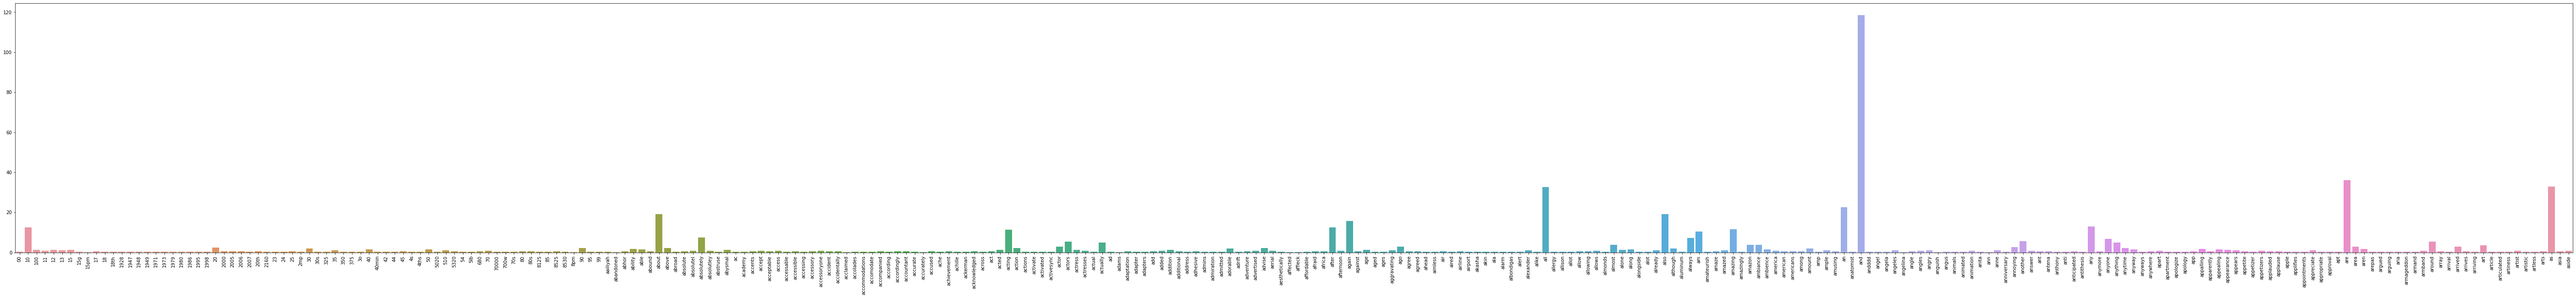

In [109]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vectorizer.get_feature_names()[:300], 
            y=total_tfidf_val[:300])
g.set_xticklabels(tfidf_vectorizer.get_feature_names()[:300], rotation = 90);

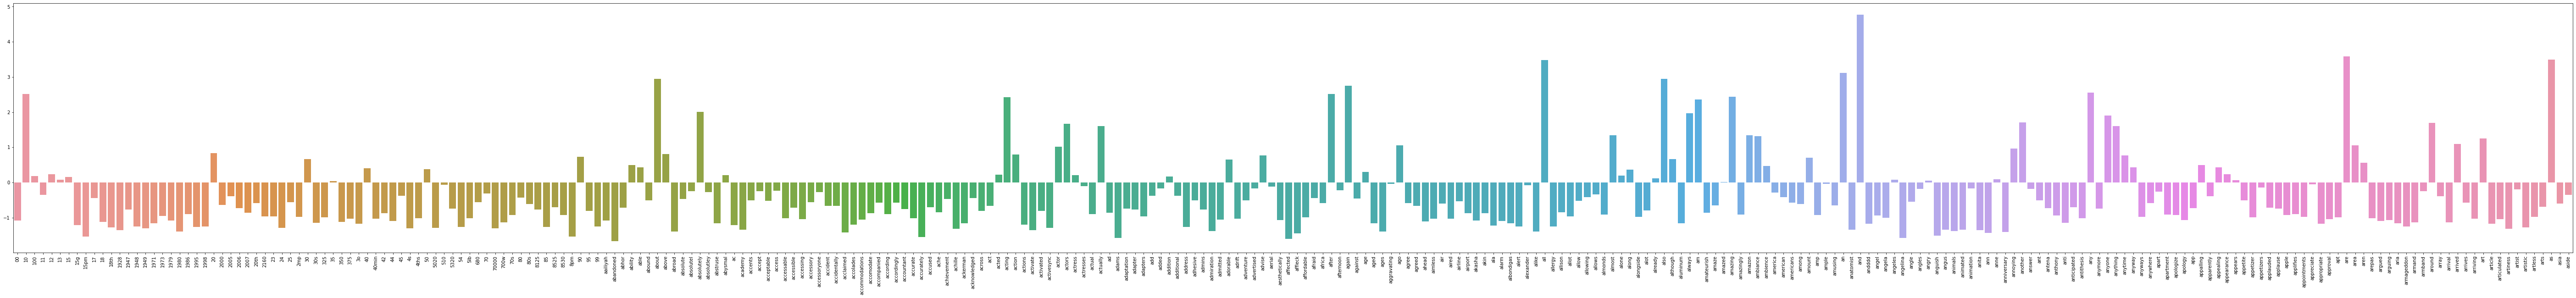

In [110]:
log_total_tfidf_val = [math.log(i) for i in total_tfidf_val]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf_vectorizer.get_feature_names()[:300], 
            y=log_total_tfidf_val[:300])
g.set_xticklabels(tfidf_vectorizer.get_feature_names()[:300], rotation = 90);

We can see that tf-idf vectorizer transforms the sentences in dataframe into a matrix, with feature names as columns, and each document as row. The element in the matrix is the feature's tf-idf value of that document.

Since tf-idf value is a ratio data type, there might be some summed values in 0~1 interval. 

This is the reason why there are some value is negative after doing log operation.

### Naive Bayesian Classifier

#### First, we use word frequency feature to build multinomial bayesian classifier.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
df_X_term_frequency = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names())
df_y_term_frequency = pd.DataFrame(df_concat['score'], columns=['score'])

df_X_term_frequency.head()

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  yummy  \
0   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
1   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
2   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
3   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   
4   0   0    0   0   0   0   0    0     0   0  ...      0      0    0      0   

   yun  z500a  zero  zillion  zombie  zombiez  
0    0      0     0        0       0        0  
1    0      0     0        0       0        0  
2    0      0     0        0       0        0  
3    0      0     0        0       0        0  
4    0      0     0        0       0        0  

[5 rows x 5155 columns]

In [112]:
df_y_term_frequency.head()

score
0      0
1      1
2      1
3      0
4      1

In [113]:
X_term_frequency = df_X_term_frequency.iloc[:,:].values
y_term_frequency = df_y_term_frequency.iloc[:,:].values.ravel()


X_term_frequency_train, X_term_frequency_test, y_term_frequency_train, y_term_frequency_test = train_test_split(X_term_frequency,
                                                                                                                y_term_frequency,
                                                                                                                test_size=0.25)

mbc = MultinomialNB()
mbc.fit(X_term_frequency_train,y_term_frequency_train)

y_term_frequency_pred = mbc.predict(X_term_frequency_test)

In [114]:
from sklearn.metrics import accuracy_score

print("Accuracy of multinomial bayesian classifier built by term-frequency feature: %.5f" % accuracy_score(y_term_frequency_test,y_term_frequency_pred))

Accuracy of multinomial bayesian classifier built by term-frequency feature: 0.82038


We can see the accuaray of multinomial bayesian classifier is quite good.

#### Now let's move on to use tf-idf feature to build multinomial bayesain classifier.

In [115]:
df_X_tfidf = pd.DataFrame(matrix_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_y_tfidf = pd.DataFrame(df_concat['score'], columns=['score'])

X_tfidf = df_X_tfidf.iloc[:,:].values
y_tfidf = df_y_tfidf.iloc[:,:].values.ravel()

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf,
                                                                            y_tfidf,
                                                                            test_size=0.25)
tfidf_mbc = MultinomialNB()
tfidf_mbc.fit(X_tfidf_train,y_tfidf_train)

y_tfidf_pred = tfidf_mbc.predict(X_tfidf_test)

print("Accuracy of multinomial bayesian classifier built by tfidf feature: %.5f" %accuracy_score(y_tfidf_test,y_tfidf_pred))

Accuracy of multinomial bayesian classifier built by tfidf feature: 0.83244


##### Comment on the difference between two classifiers:

In the experiment above, I build two multinomial naive bayesian classiffiers by using term-frequency feature and tf-idf feature. One may think that multinomial naive bayesian classiffier is not suitable for tf-idf feature. However, it may be. My reason is that the inverse document frequency is the same for every document, so we may ignore this term. Furthermore, the term-frequency (in tf-idf) term is a word's number of occurences devided by the number of words in a document, and we may assume that if a specific word appears more often, the higher the term-frequency (in tf-idf) is. So, in our assumption, the tf-idf feature maybe suitable for multinomial naive bayesian classiffier.

We can see the difference between the two classifiers. The one built by term-frequency feature is based on the likelihood of terms' number of ocurrences given score labels, and the other is based on the likelihood of tf term given score labels. Both classifiers use the likelihood estimated in the training dataset.

We can also built a gaussian naive bayesian classifier using tf-idf feature since the tf-idf feature is continuous value.

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_tfidf_train_std = std.fit_transform(X_tfidf_train)
X_tfidf_test_std = std.transform(X_tfidf_test)

gbc = GaussianNB()
gbc.fit(X_tfidf_train_std,y_tfidf_train)

y_gaussian_pred = gbc.predict(X_tfidf_test_std)

print("Accuracy of gaussian bayesian classifier built by tfidf feature: %.5f" %accuracy_score(y_gaussian_pred,y_tfidf_test))



Accuracy of gaussian bayesian classifier built by tfidf feature: 0.69035


As we can see, the accuracy of gaussian naive bayesian classifier built by tf-idf feature is not as good as multinomial bayesian classifier built by tf-idf feature. The reason may be the estimation of mean and variance is far away from the population parameter.

## Part4

1. I think the part of drawing heatmap in the lab is not quite meaningful. Since there are a lot of zeros in the document matrix and there are a lot of terms, the plot is really messy and wastes time. We can't get much information from the heatmap because of the messiness.


2. I think that adding catogory name column into the dataframe isn't that meaningful, since we have the catogory column describe the same thing. Maybe the better way is adding catogory name column and removing catogory column if we want to let people know what the catogory names are in the dataset.


3. To improve the data preprocessing for specific datasets, we must need to know more about the knowledge of different dataset and think more about what kind of processing will make the prediction better. For example, in the lab, after generating document matrix, we can see there are a lot of zero in it. It means that there are some terms just appear in very very few documents, and those terms may be noise for our classification task. To get the better model, we may try to remove those terms. Besides, drawing appropriate plot is also a good way for us to know more about our data.